In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'font.family': 'Cambria',
    'text.usetex': False,
    'axes.facecolor': 'white',
    'grid.color': 'gray'
})

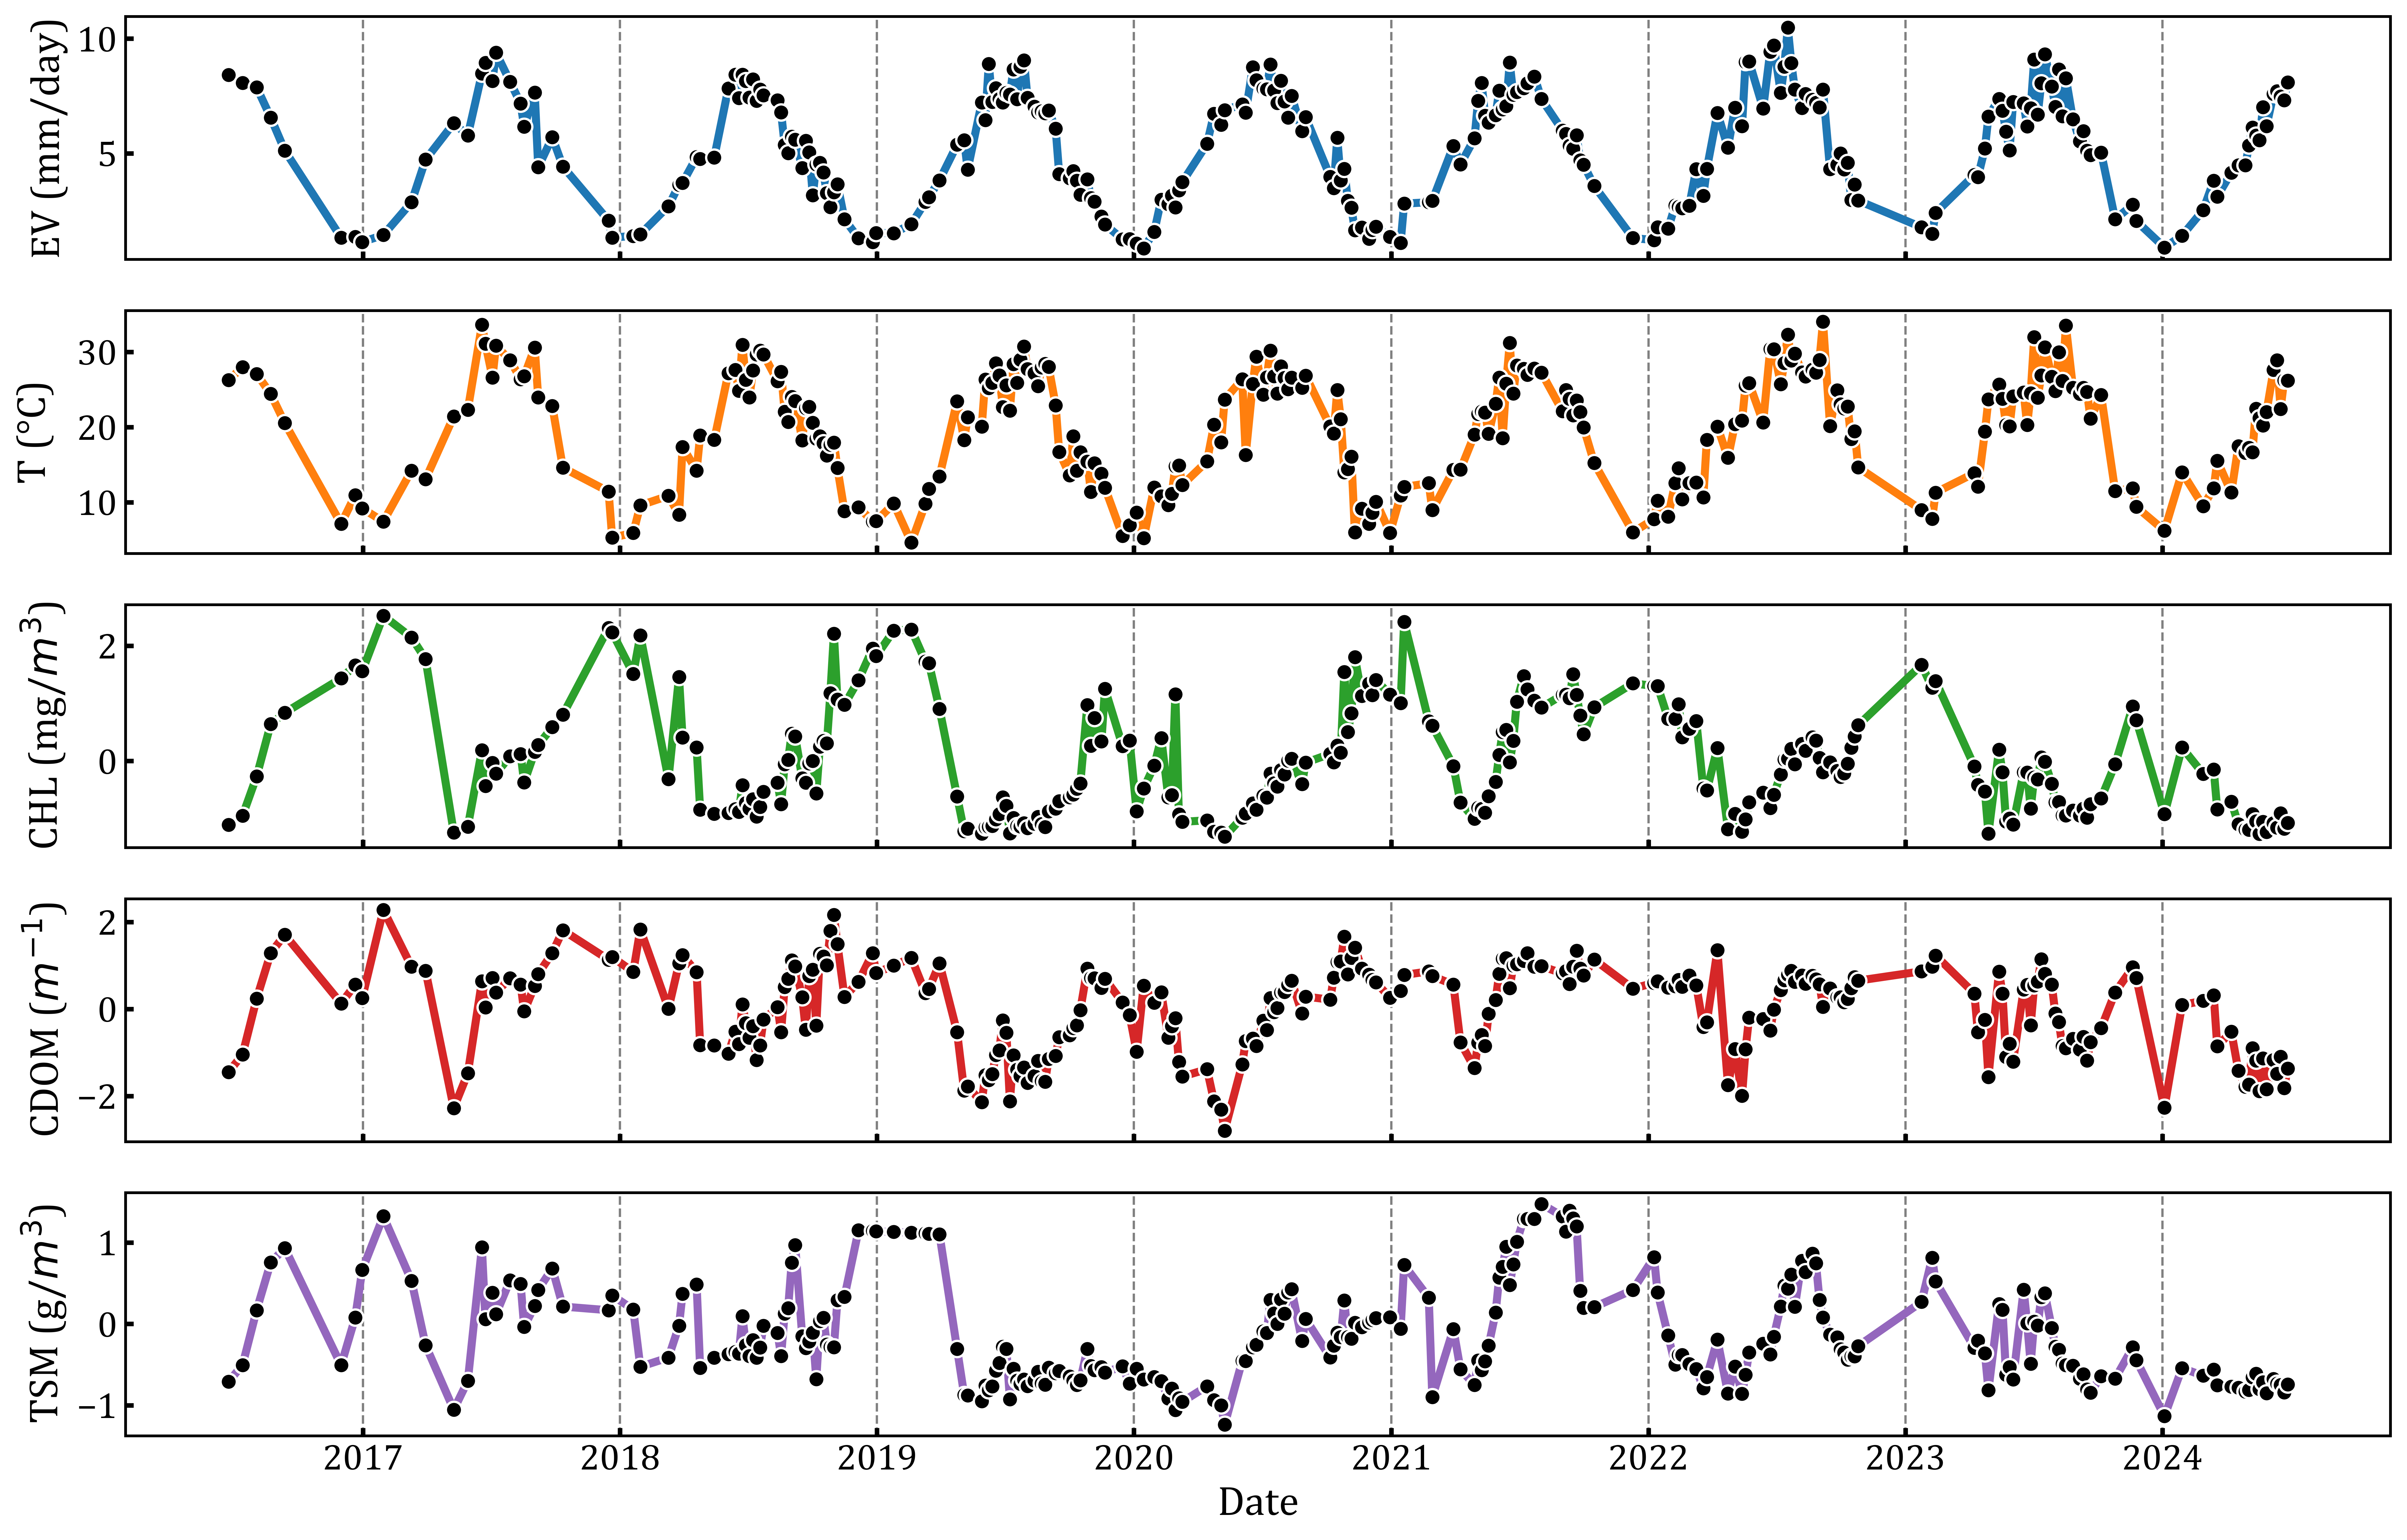

In [3]:
# Load the dataset
data = pd.read_csv('../dataset/data.csv')

# Convert 'Dates' to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%d/%Y')

# Variables to plot and their corresponding y-axis labels
variables = {
    'EV': 'EV (mm/day)',
    'T': 'T (°C)',
    'CHL': 'CHL (mg/$m^{3}$)',
    'CDOM': 'CDOM ($m^{-1}$)',
    'TSM': 'TSM (g/$m^{3}$)',
}

# Set up the subplots (one row per variable)
fig, axes = plt.subplots(len(variables), 1, figsize=(15, 10), sharex=True, dpi=600)

# Colors for each parameter with higher contrast
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot each variable in its own subplot
for i, (var, ylabel) in enumerate(variables.items()):
    axes[i].plot(data['DATE'], data[var], linestyle='-', lw=3.5, color=colors[i], label=ylabel)
    axes[i].scatter(data['DATE'], data[var], s=50, c='black', edgecolor='white', zorder=5)  # Larger markers
    if ylabel == 'CHL (mg/$m^{3}$)':
        axes[i].set_ylabel(ylabel, fontsize=18, labelpad=13)
    elif ylabel == 'T (°C)':
        axes[i].set_ylabel(ylabel, fontsize=18, labelpad=10)
    else:
        axes[i].set_ylabel(ylabel, fontsize=18)
    axes[i].tick_params(axis='both', labelsize=16, width=2, direction='in')  # Bold ticks, inward
    axes[i].grid(True, axis="x", linestyle='--', linewidth=1)  # Lighter grid for better data focus

# Set the x-axis label for the bottom plot
axes[-1].set_xlabel('Date', fontsize=18)

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig(f"../plots/timeseries.png", dpi=600, bbox_inches='tight')

plt.show()